# Artificial Neural Networks

Keras library is used here. Keras is included in the lower-level library TensorFlow.

In [177]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Data in from SDSS asteroid taxonomy

In [4]:
temp = pd.read_fwf('sdsstax.dat')
temp

ASTNUM      ASTNAME PROVDESIG  T  SC    MOID  B    LRU     EU  LRG  \
0          166      Rhodope         -  C  78  s394c9  0  0.860  0.008  1.0   
1          183       Istria         -  S   0  seef1c  0  0.856  0.012  1.0   
2          208    Lacrimosa         -  S  85  s458db  0  0.780  0.012  1.0   
3          220    Stephania         -  X  65  s03bbc  0  0.924  0.012  1.0   
4          227  Philosophia         -  C  82  sd038c  0  0.908  0.008  1.0   
...        ...          ...       ... ..  ..     ... ..    ...    ...  ...   
107461       0            -  6865 P-L  Q  45  s0983d  1  0.832  0.052  1.0   
107462       0            -  7590 P-L  C   9  sc03d7  1  0.980  0.048  1.0   
107463       0            -  7602 P-L  C  42  s40598  0  0.936  0.024  1.0   
107464       0            -  7602 P-L  C  23  s3c767  0  0.964  0.016  1.0   
107465       0            -  7602 P-L  C  32  s3e41f  1  0.924  0.040  1.0   

           GE    LRR     ER    LRI     EI    LRZ     EZ  
0       0.008  1.036  0.004  1.056  0.008  1.048  0.012  
1       0.004  1.084  0.004  1.124  0.004  1.080  0.004  
2       0.008  1.072  0.008  1.112  0.004  1.084  0.008  
3       0.008  1.020  0.008  1.060  0.008  1.040  0.008  
4       0.004  1.024  0.004  1.036  0.008  1.016  0.008  
...       ...    ...    ...    ...    ...    ...    ...  
107461  0.008  1.100  0.012  1.108  0.016  1.036  0.020  
107462  0.012  1.056  0.008  1.048  0.012  1.076  0.024  
107463  0.008  0.992  0.004  0.988  0.004  0.960  0.012  
107464  0.008  1.004  0.008  0.988  0.008  0.996  0.008  
107465  0.012  0.992  0.008  0.996  0.008  0.964  0.016  

[107466 rows x 17 columns]

Perhaps too much data for somple example, let's take only 10,000 first asteroids

In [37]:
data = temp.head(10000).copy()

Classification to be learned: variable 'T', the taxonomic classification of an asteroid. Variables from which to classify: logarithmic reflectancies in filters u, r, i, and z, so variables 'LRU', 'LRR', 'LRI', LRZ'.

We wil simplify the task by reducing the 27 classes in the taxonomy into 9 by taking just the first letter of the class.

In [31]:
types = np.unique(data['T'].tolist())
print(types)
len(types)

['A' 'AQ' 'C' 'CL' 'CO' 'CQ' 'CS' 'CX' 'D' 'DL' 'DS' 'L' 'LS' 'O' 'Q' 'QO'
 'QV' 'S' 'SA' 'SQ' 'SV' 'V' 'X' 'XD' 'XL' 'XQ' 'XS']


27

In [38]:
data['ST'] = data.apply(lambda x: x['T'][0], axis=1)
stypes = np.unique(data['ST'].tolist())
print(stypes)
len(stypes)

['A' 'C' 'D' 'L' 'O' 'Q' 'S' 'V' 'X']


9

Let's try to see classification pattern with filter pairs...

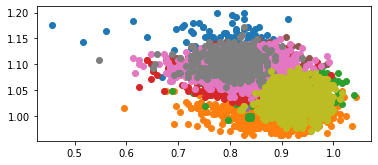

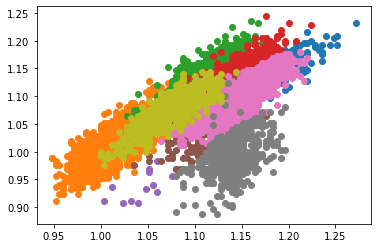

In [64]:
cols = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive']
plt.axes().set_aspect(1)
for i in range(len(stypes)):
    plt.scatter(x=data[data['ST']==stypes[i]]['LRU'], y=data[data['ST']==stypes[i]]['LRR'], color=cols[i])
plt.show()
for i in range(len(stypes)):
    plt.scatter(x=data[data['ST']==stypes[i]]['LRI'], y=data[data['ST']==stypes[i]]['LRZ'], color=cols[i])


Let's build a neural network classifier. We will use 1 layer only, and select 15 nodes. The second layer is the output layer with softmax activation.

In [154]:
model = Sequential()
model.add(Dense(15, input_dim=4, activation='tanh'))
model.add(Dense(len(stypes), activation='softmax'))

Model needs to be compiled.

In [155]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Divide data into testing and training.

In [156]:
datar = data.sample(10000)
dataTrain = datar.head(8000)
dataTest = datar.tail(2000)

In [157]:
XTrain = dataTrain[['LRU','LRR','LRI','LRZ']].to_numpy()
XTest = dataTest[['LRU','LRR','LRI','LRZ']].to_numpy()

For character lables, encode into integers, and then into one-hot-encoding

In [158]:
encoder = preprocessing.LabelEncoder()
encoder.fit(stypes)
yTrain = keras.utils.to_categorical(encoder.transform(dataTrain['ST']), num_classes=len(stypes))
yTest = keras.utils.to_categorical(encoder.transform(dataTest['ST']), num_classes=len(stypes))

Train the model

In [ ]:
history = model.fit(XTrain, yTrain, epochs=3000, validation_split=0.2, shuffle=True)

Show the training history with validation loss and accuracy.

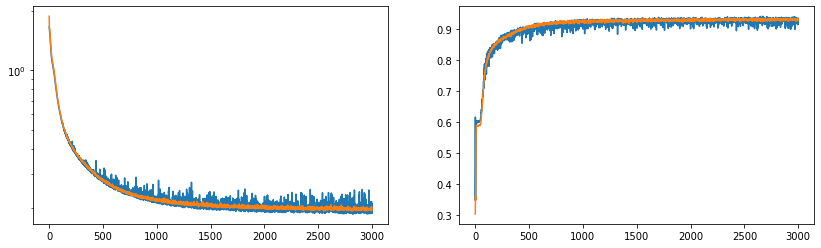

In [170]:
fig, axs = plt.subplots(1,2,figsize=[14,4])
axs[0].plot(history.history['val_loss'])
axs[0].plot(history.history['loss'])
axs[0].set_yscale('log')
axs[1].plot(history.history['val_accuracy'])
axs[1].plot(history.history['accuracy'])

Evaluate final accuracy with test data.

In [173]:
model.evaluate(XTest, yTest)

63/63 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.9205


[0.27086976170539856, 0.9204999804496765]

Confusion matrix. First, get predictions.

In [205]:
pred = np.argmax(model.predict(XTest),axis=1)
corr = np.argmax(yTest,axis=1)

Then, confusion matrix and nice print.

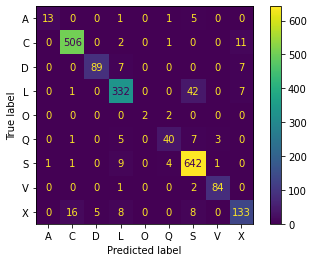

In [213]:
cm = confusion_matrix(corr,pred)
ConfusionMatrixDisplay(cm, display_labels=stypes).plot()